In [1]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')

In [36]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [37]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [4]:
data['message'].iloc[6:20]

6     RT @thenation: Mike Pence doesn’t believe in g...
7     RT @makeandmendlife: Six big things we can ALL...
8     @AceofSpadesHQ My 8yo nephew is inconsolable. ...
9     RT @paigetweedy: no offense… but like… how do ...
10    RT @StephenSchlegel: she's thinking about how ...
11    I do hope people who are vocal about climate c...
12    RT @tveitdal: We only have a 5 percent chance ...
13    RT @Alifaith55: Oh. My. God.\n\nTrump's Govern...
14    Fossil fuel giant ExxonMobil ‘misled’ the publ...
15    RT @GlblCtzn: 'I don't wanna live forever – an...
16    RT @jackholmes0: Issues scrubbed from https://...
17    RT @patagonia: If our elected leaders fail to ...
18    RT @SenSanders: We have a president-elect who ...
19    Calum: *tweets abt reunitingish w the cast*\n-...
Name: message, dtype: object

In [72]:
data['message'].dtypes

dtype('O')

In [5]:
data.shape

(15819, 3)

In [6]:
data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [7]:
print(len(data['message']))
print(len(data['message'].apply(lambda x: x.isspace())))

15819
15819


In [8]:
sent_dist = data.groupby('sentiment')[['tweetid']].count()
sent_dist.reset_index()

,sentiment,tweetid
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


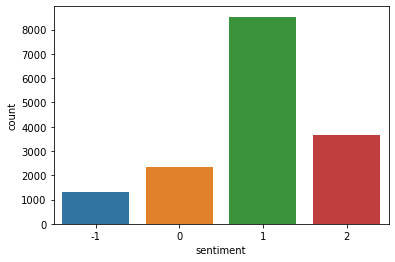

In [9]:
sns.countplot(x = data['sentiment'], data = data)
plt.show()

In [10]:
data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

## training with imbalanced data

In [41]:
from sklearn.model_selection import train_test_split

X = data['message']
y = data['sentiment']

#X_train = data['message']  # this time we want to look at the text
#y_train = data['sentiment']
#X_test = test['message']
#y_test = test['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline


In [55]:
algs = [LogisticRegression(random_state = 5), SVC(kernel = 'linear', random_state = 5), SVC(kernel = 'rbf', random_state = 5)
        ,MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=6),RandomForestClassifier()]

In [71]:
for i in range(0, len(algs)):
    text_clf = Pipeline([('tfidf', CountVectorizer(lowercase = True,stop_words='english', 
                                                   ngram_range=(1, 2), analyzer='word',max_df = 0.8)), ('clf', algs[i]),])
    ##lowercase = True,stop_words='english', ngram_range=(1, 2), analyzer='word',max_df = 0.8
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    
    
    print(algs[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print('-------------------------------------------------------')

C:\Users\kea pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[ 163   66  180   19]
 [  19  314  355   49]
 [  15  125 2530  191]
 [   5   20  280  890]]
              precision    recall  f1-score   support

          -1       0.81      0.38      0.52       428
           0       0.60      0.43      0.50       737
           1       0.76      0.88      0.82      2861
           2       0.77      0.74      0.76      1195

    accuracy                           0.75      5221
   macro avg       0.73      0.61      0.65      5221
weighted avg       0.74      0.75      0.73      5221

F1_score:  0.733
-------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
 

In [98]:
#from imblearn.over_sampling import ADASYN

In [101]:
#ada = ADASYN(random_state = 5)

In [103]:
#X_train_res, y_train_res = ada.fit_sample(X, y)

In [87]:
#from imblearn.under_sampling import NearMiss 
#nr = NearMiss() 

In [104]:
#X_train_res, y_train_res = nr.fit_sample(X_train, y_train)

## balancing the classes

### class size to up/down sample by

In [123]:
class_size = int(len(data[data['sentiment']==1])/2)

In [115]:
from sklearn.utils import resample

### seperating the four classes

In [120]:
class_1 = data[data['sentiment']==-1]
class_2 = data[data['sentiment']==0]
class_3 = data[data['sentiment']==1]
class_4 = data[data['sentiment']==2]

### upsampling classes 1, 2, and 4 & downsampling class 3

In [124]:
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)



In [125]:
res_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

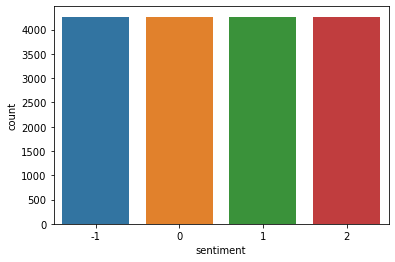

In [126]:
sns.countplot(x = res_df['sentiment'], data = data)
plt.show()

equal distribution of classes as shown on the count plot, therefore classes are balanced

## training balanced data

In [127]:
X_res = res_df['message']
y_res = res_df['sentiment']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [136]:
for i in range(0, len(algs)):
    text_clf = Pipeline([('count_vec', CountVectorizer(lowercase = True,stop_words='english', 
                                                   ngram_range=(1, 2), analyzer='word')), ('clf', algs[i]),])
   
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    
    
    print(algs[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
    print('-------------------------------------------------------')

C:\Users\kea pc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[1042   20    8    6]
 [  15  980   54   25]
 [  52  122  731  131]
 [   5   21   72  981]]
              precision    recall  f1-score   support

          -1       0.94      0.97      0.95      1076
           0       0.86      0.91      0.88      1074
           1       0.85      0.71      0.77      1036
           2       0.86      0.91      0.88      1079

    accuracy                           0.88      4265
   macro avg       0.87      0.87      0.87      4265
weighted avg       0.87      0.88      0.87      4265

F1_score:  0.873
-------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
 